<a href="https://colab.research.google.com/github/manishmcsa/Assignment-8--S8/blob/main/Assignment9_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Assigment6"

/content/drive/MyDrive/Assigment6


In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim

from data_engine import DataEngine
from models import *
from results import plot_misclassified_images, plot_graph
from train import train
from test import test
from utils import *
from config import ModelConfig

In [4]:
# View model config
args = ModelConfig()
args.print_config()

print()
# Set seed
init_seed(args)

Model Parameters:
{ 'batch_size_cpu': 32,
  'batch_size_cuda': 32,
  'dropout_value': 0.1,
  'epochs': 50,
  'num_workers': 4,
  'seed': 1}

CUDA Available


Files already downloaded and verified
Files already downloaded and verified
 deer   car horse   dog


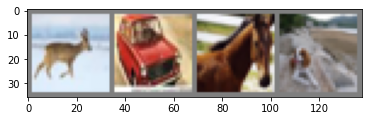

In [5]:
data = DataEngine(args)

# get some random training images
dataiter = iter(data.train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % data.classes[labels[j]] for j in range(4)))

In [6]:
use_cuda = torch.cuda.is_available() # toc check is GPU is available
device = torch.device("cuda" if use_cuda else "cpu") # enable device to GPU if available otherwise CPU
#device = which_device()
model = ResNet18().to(device)
show_model_summary(model, device, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

def run():
  test_losses = []
  test_accs = []
  misclassified_imgs = []
  for epoch in range(args.epochs):
      print("EPOCH:", epoch+1)
      train(model, device, data.train_loader, criterion, optimizer, epoch)
      test(model, device, data.test_loader, criterion, data.classes, test_losses, test_accs, misclassified_imgs, epoch==args.epochs-1)
  return test_losses, test_accs, misclassified_imgs

# train and test the model
test_losses, test_accs, misclassified_imgs = run()

  0%|          | 0/1563 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.1778734922409058 Batch_id=1562 Accuracy=53.38: 100%|██████████| 1563/1563 [01:05<00:00, 23.99it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0324, Accuracy: 6283/10000 (62.83%)

EPOCH: 2


Loss=0.37278541922569275 Batch_id=1562 Accuracy=71.66: 100%|██████████| 1563/1563 [01:04<00:00, 24.18it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0243, Accuracy: 7266/10000 (72.66%)

EPOCH: 3


Loss=1.0747127532958984 Batch_id=1562 Accuracy=78.48: 100%|██████████| 1563/1563 [01:04<00:00, 24.08it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0195, Accuracy: 7834/10000 (78.34%)

EPOCH: 4


Loss=0.4763586223125458 Batch_id=1562 Accuracy=82.61: 100%|██████████| 1563/1563 [01:04<00:00, 24.09it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0181, Accuracy: 8018/10000 (80.18%)

EPOCH: 5


Loss=1.012931227684021 Batch_id=1562 Accuracy=85.62: 100%|██████████| 1563/1563 [01:04<00:00, 24.14it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0165, Accuracy: 8234/10000 (82.34%)

EPOCH: 6


Loss=0.7012352347373962 Batch_id=1562 Accuracy=88.05: 100%|██████████| 1563/1563 [01:05<00:00, 23.99it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0163, Accuracy: 8269/10000 (82.69%)

EPOCH: 7


Loss=0.18350329995155334 Batch_id=1562 Accuracy=89.96: 100%|██████████| 1563/1563 [01:05<00:00, 24.02it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0160, Accuracy: 8292/10000 (82.92%)

EPOCH: 8


Loss=0.07639402151107788 Batch_id=1562 Accuracy=91.47: 100%|██████████| 1563/1563 [01:04<00:00, 24.05it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0166, Accuracy: 8249/10000 (82.49%)

EPOCH: 9


Loss=0.16464433073997498 Batch_id=1562 Accuracy=92.74: 100%|██████████| 1563/1563 [01:04<00:00, 24.09it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0168, Accuracy: 8309/10000 (83.09%)

EPOCH: 10


Loss=0.04197123274207115 Batch_id=1562 Accuracy=94.28: 100%|██████████| 1563/1563 [01:04<00:00, 24.23it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0153, Accuracy: 8418/10000 (84.18%)

EPOCH: 11


Loss=0.05326715111732483 Batch_id=1562 Accuracy=94.70: 100%|██████████| 1563/1563 [01:04<00:00, 24.22it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0172, Accuracy: 8322/10000 (83.22%)

EPOCH: 12


Loss=0.1830441802740097 Batch_id=1562 Accuracy=95.32: 100%|██████████| 1563/1563 [01:04<00:00, 24.17it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0179, Accuracy: 8332/10000 (83.32%)

EPOCH: 13


Loss=0.24979576468467712 Batch_id=1562 Accuracy=96.10: 100%|██████████| 1563/1563 [01:04<00:00, 24.19it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0163, Accuracy: 8462/10000 (84.62%)

EPOCH: 14


Loss=0.036750294268131256 Batch_id=1562 Accuracy=96.70: 100%|██████████| 1563/1563 [01:04<00:00, 24.17it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0173, Accuracy: 8426/10000 (84.26%)

EPOCH: 15


Loss=0.03915201500058174 Batch_id=1562 Accuracy=97.04: 100%|██████████| 1563/1563 [01:04<00:00, 24.21it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0188, Accuracy: 8362/10000 (83.62%)

EPOCH: 16


Loss=0.1142548993229866 Batch_id=1562 Accuracy=97.56: 100%|██████████| 1563/1563 [01:04<00:00, 24.22it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 86 %
Accuracy of  bird : 81 %
Accuracy of   cat : 62 %
Accuracy of  deer : 79 %
Accuracy of   dog : 77 %
Accuracy of  frog : 88 %
Accuracy of horse : 90 %
Accuracy of  ship : 93 %
Accuracy of truck : 92 %

Test set: Average loss: 0.0165, Accuracy: 8505/10000 (85.05%)

EPOCH: 17


Loss=0.1773354709148407 Batch_id=1562 Accuracy=97.92: 100%|██████████| 1563/1563 [01:04<00:00, 24.12it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0171, Accuracy: 8499/10000 (84.99%)

EPOCH: 18


Loss=0.021119441837072372 Batch_id=1562 Accuracy=98.03: 100%|██████████| 1563/1563 [01:04<00:00, 24.19it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0185, Accuracy: 8389/10000 (83.89%)

EPOCH: 19


Loss=0.053887322545051575 Batch_id=1562 Accuracy=98.10: 100%|██████████| 1563/1563 [01:04<00:00, 24.19it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0179, Accuracy: 8452/10000 (84.52%)

EPOCH: 20


Loss=0.06633371114730835 Batch_id=1562 Accuracy=98.42: 100%|██████████| 1563/1563 [01:04<00:00, 24.19it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 85 %
Accuracy of   car : 94 %
Accuracy of  bird : 78 %
Accuracy of   cat : 67 %
Accuracy of  deer : 81 %
Accuracy of   dog : 78 %
Accuracy of  frog : 89 %
Accuracy of horse : 90 %
Accuracy of  ship : 94 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0179, Accuracy: 8519/10000 (85.19%)

EPOCH: 21


Loss=0.007540632039308548 Batch_id=1562 Accuracy=98.63: 100%|██████████| 1563/1563 [01:04<00:00, 24.22it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 96 %
Accuracy of   car : 97 %
Accuracy of  bird : 81 %
Accuracy of   cat : 67 %
Accuracy of  deer : 80 %
Accuracy of   dog : 82 %
Accuracy of  frog : 82 %
Accuracy of horse : 81 %
Accuracy of  ship : 94 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0170, Accuracy: 8530/10000 (85.30%)

EPOCH: 22


Loss=0.04918217286467552 Batch_id=1562 Accuracy=98.82: 100%|██████████| 1563/1563 [01:04<00:00, 24.16it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 93 %
Accuracy of  bird : 83 %
Accuracy of   cat : 67 %
Accuracy of  deer : 69 %
Accuracy of   dog : 77 %
Accuracy of  frog : 91 %
Accuracy of horse : 89 %
Accuracy of  ship : 91 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0174, Accuracy: 8553/10000 (85.53%)

EPOCH: 23


Loss=0.007905613631010056 Batch_id=1562 Accuracy=98.85: 100%|██████████| 1563/1563 [01:04<00:00, 24.15it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 87 %
Accuracy of   car : 89 %
Accuracy of  bird : 73 %
Accuracy of   cat : 69 %
Accuracy of  deer : 79 %
Accuracy of   dog : 85 %
Accuracy of  frog : 94 %
Accuracy of horse : 89 %
Accuracy of  ship : 91 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0166, Accuracy: 8583/10000 (85.83%)

EPOCH: 24


Loss=0.02656078152358532 Batch_id=1562 Accuracy=98.81: 100%|██████████| 1563/1563 [01:04<00:00, 24.18it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0187, Accuracy: 8492/10000 (84.92%)

EPOCH: 25


Loss=0.05131255090236664 Batch_id=1562 Accuracy=99.05: 100%|██████████| 1563/1563 [01:04<00:00, 24.14it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 82 %
Accuracy of   car : 91 %
Accuracy of  bird : 81 %
Accuracy of   cat : 73 %
Accuracy of  deer : 81 %
Accuracy of   dog : 84 %
Accuracy of  frog : 88 %
Accuracy of horse : 85 %
Accuracy of  ship : 88 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0165, Accuracy: 8599/10000 (85.99%)

EPOCH: 26


Loss=0.0034548472613096237 Batch_id=1562 Accuracy=99.22: 100%|██████████| 1563/1563 [01:04<00:00, 24.11it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 92 %
Accuracy of  bird : 74 %
Accuracy of   cat : 78 %
Accuracy of  deer : 77 %
Accuracy of   dog : 84 %
Accuracy of  frog : 86 %
Accuracy of horse : 91 %
Accuracy of  ship : 94 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0169, Accuracy: 8597/10000 (85.97%)

EPOCH: 27


Loss=0.02033277042210102 Batch_id=1562 Accuracy=99.09: 100%|██████████| 1563/1563 [01:04<00:00, 24.17it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 93 %
Accuracy of  bird : 84 %
Accuracy of   cat : 78 %
Accuracy of  deer : 79 %
Accuracy of   dog : 75 %
Accuracy of  frog : 94 %
Accuracy of horse : 90 %
Accuracy of  ship : 94 %
Accuracy of truck : 87 %

Test set: Average loss: 0.0164, Accuracy: 8615/10000 (86.15%)

EPOCH: 28


Loss=0.019359320402145386 Batch_id=1562 Accuracy=99.00: 100%|██████████| 1563/1563 [01:05<00:00, 23.98it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 87 %
Accuracy of   car : 96 %
Accuracy of  bird : 80 %
Accuracy of   cat : 70 %
Accuracy of  deer : 83 %
Accuracy of   dog : 75 %
Accuracy of  frog : 87 %
Accuracy of horse : 84 %
Accuracy of  ship : 95 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0161, Accuracy: 8627/10000 (86.27%)

EPOCH: 29


Loss=0.03285956010222435 Batch_id=1562 Accuracy=99.06: 100%|██████████| 1563/1563 [01:05<00:00, 23.95it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 94 %
Accuracy of  bird : 71 %
Accuracy of   cat : 63 %
Accuracy of  deer : 85 %
Accuracy of   dog : 80 %
Accuracy of  frog : 96 %
Accuracy of horse : 88 %
Accuracy of  ship : 93 %
Accuracy of truck : 86 %

Test set: Average loss: 0.0170, Accuracy: 8625/10000 (86.25%)

EPOCH: 30


Loss=0.08150125294923782 Batch_id=1562 Accuracy=99.28: 100%|██████████| 1563/1563 [01:05<00:00, 24.04it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 93 %
Accuracy of   car : 93 %
Accuracy of  bird : 75 %
Accuracy of   cat : 60 %
Accuracy of  deer : 87 %
Accuracy of   dog : 84 %
Accuracy of  frog : 88 %
Accuracy of horse : 82 %
Accuracy of  ship : 94 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0181, Accuracy: 8548/10000 (85.48%)

EPOCH: 31


Loss=0.008635449223220348 Batch_id=1562 Accuracy=99.24: 100%|██████████| 1563/1563 [01:04<00:00, 24.06it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 94 %
Accuracy of  bird : 85 %
Accuracy of   cat : 68 %
Accuracy of  deer : 83 %
Accuracy of   dog : 85 %
Accuracy of  frog : 87 %
Accuracy of horse : 90 %
Accuracy of  ship : 98 %
Accuracy of truck : 83 %

Test set: Average loss: 0.0165, Accuracy: 8625/10000 (86.25%)

EPOCH: 32


Loss=0.4199994206428528 Batch_id=1562 Accuracy=99.28: 100%|██████████| 1563/1563 [01:05<00:00, 23.95it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Test set: Average loss: 0.0192, Accuracy: 8464/10000 (84.64%)

EPOCH: 33


Loss=0.1852070540189743 Batch_id=1562 Accuracy=99.09: 100%|██████████| 1563/1563 [01:04<00:00, 24.13it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 83 %
Accuracy of   car : 93 %
Accuracy of  bird : 81 %
Accuracy of   cat : 71 %
Accuracy of  deer : 81 %
Accuracy of   dog : 85 %
Accuracy of  frog : 86 %
Accuracy of horse : 88 %
Accuracy of  ship : 91 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0175, Accuracy: 8560/10000 (85.60%)

EPOCH: 34


Loss=0.06298962235450745 Batch_id=1562 Accuracy=98.84: 100%|██████████| 1563/1563 [01:04<00:00, 24.09it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 86 %
Accuracy of   car : 92 %
Accuracy of  bird : 83 %
Accuracy of   cat : 69 %
Accuracy of  deer : 83 %
Accuracy of   dog : 83 %
Accuracy of  frog : 87 %
Accuracy of horse : 93 %
Accuracy of  ship : 90 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0170, Accuracy: 8570/10000 (85.70%)

EPOCH: 35


Loss=0.10134539008140564 Batch_id=1562 Accuracy=99.00: 100%|██████████| 1563/1563 [01:05<00:00, 23.98it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 91 %
Accuracy of   car : 96 %
Accuracy of  bird : 88 %
Accuracy of   cat : 68 %
Accuracy of  deer : 82 %
Accuracy of   dog : 75 %
Accuracy of  frog : 92 %
Accuracy of horse : 86 %
Accuracy of  ship : 97 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0173, Accuracy: 8540/10000 (85.40%)

EPOCH: 36


Loss=0.01140707079321146 Batch_id=1562 Accuracy=98.99: 100%|██████████| 1563/1563 [01:04<00:00, 24.12it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 85 %
Accuracy of   car : 93 %
Accuracy of  bird : 91 %
Accuracy of   cat : 70 %
Accuracy of  deer : 79 %
Accuracy of   dog : 77 %
Accuracy of  frog : 85 %
Accuracy of horse : 86 %
Accuracy of  ship : 93 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0172, Accuracy: 8545/10000 (85.45%)

EPOCH: 37


Loss=0.011661927215754986 Batch_id=1562 Accuracy=99.15: 100%|██████████| 1563/1563 [01:05<00:00, 24.03it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 84 %
Accuracy of   car : 90 %
Accuracy of  bird : 83 %
Accuracy of   cat : 67 %
Accuracy of  deer : 87 %
Accuracy of   dog : 83 %
Accuracy of  frog : 91 %
Accuracy of horse : 91 %
Accuracy of  ship : 94 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0163, Accuracy: 8626/10000 (86.26%)

EPOCH: 38


Loss=0.05107400566339493 Batch_id=1562 Accuracy=99.34: 100%|██████████| 1563/1563 [01:05<00:00, 24.02it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 80 %
Accuracy of   car : 88 %
Accuracy of  bird : 80 %
Accuracy of   cat : 66 %
Accuracy of  deer : 92 %
Accuracy of   dog : 75 %
Accuracy of  frog : 93 %
Accuracy of horse : 83 %
Accuracy of  ship : 96 %
Accuracy of truck : 92 %

Test set: Average loss: 0.0183, Accuracy: 8527/10000 (85.27%)

EPOCH: 39


Loss=0.12645559012889862 Batch_id=1562 Accuracy=99.51: 100%|██████████| 1563/1563 [01:05<00:00, 23.96it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 89 %
Accuracy of  bird : 83 %
Accuracy of   cat : 72 %
Accuracy of  deer : 90 %
Accuracy of   dog : 79 %
Accuracy of  frog : 91 %
Accuracy of horse : 86 %
Accuracy of  ship : 93 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0168, Accuracy: 8599/10000 (85.99%)

EPOCH: 40


Loss=0.05482133477926254 Batch_id=1562 Accuracy=99.32: 100%|██████████| 1563/1563 [01:04<00:00, 24.09it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 84 %
Accuracy of   car : 94 %
Accuracy of  bird : 89 %
Accuracy of   cat : 75 %
Accuracy of  deer : 87 %
Accuracy of   dog : 62 %
Accuracy of  frog : 88 %
Accuracy of horse : 86 %
Accuracy of  ship : 88 %
Accuracy of truck : 97 %

Test set: Average loss: 0.0180, Accuracy: 8523/10000 (85.23%)

EPOCH: 41


Loss=0.011171701364219189 Batch_id=1562 Accuracy=99.26: 100%|██████████| 1563/1563 [01:05<00:00, 24.00it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 94 %
Accuracy of  bird : 78 %
Accuracy of   cat : 75 %
Accuracy of  deer : 76 %
Accuracy of   dog : 75 %
Accuracy of  frog : 91 %
Accuracy of horse : 90 %
Accuracy of  ship : 95 %
Accuracy of truck : 84 %

Test set: Average loss: 0.0168, Accuracy: 8597/10000 (85.97%)

EPOCH: 42


Loss=0.013355269096791744 Batch_id=1562 Accuracy=99.39: 100%|██████████| 1563/1563 [01:05<00:00, 24.02it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 92 %
Accuracy of  bird : 76 %
Accuracy of   cat : 71 %
Accuracy of  deer : 85 %
Accuracy of   dog : 78 %
Accuracy of  frog : 92 %
Accuracy of horse : 90 %
Accuracy of  ship : 91 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0158, Accuracy: 8649/10000 (86.49%)

EPOCH: 43


Loss=0.009563267230987549 Batch_id=1562 Accuracy=99.27: 100%|██████████| 1563/1563 [01:05<00:00, 23.95it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 96 %
Accuracy of  bird : 70 %
Accuracy of   cat : 79 %
Accuracy of  deer : 90 %
Accuracy of   dog : 80 %
Accuracy of  frog : 88 %
Accuracy of horse : 88 %
Accuracy of  ship : 90 %
Accuracy of truck : 88 %

Test set: Average loss: 0.0167, Accuracy: 8605/10000 (86.05%)

EPOCH: 44


Loss=0.019079649820923805 Batch_id=1562 Accuracy=99.39: 100%|██████████| 1563/1563 [01:05<00:00, 23.99it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 92 %
Accuracy of  bird : 76 %
Accuracy of   cat : 72 %
Accuracy of  deer : 78 %
Accuracy of   dog : 76 %
Accuracy of  frog : 93 %
Accuracy of horse : 86 %
Accuracy of  ship : 93 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0160, Accuracy: 8665/10000 (86.65%)

EPOCH: 45


Loss=0.057565703988075256 Batch_id=1562 Accuracy=99.29: 100%|██████████| 1563/1563 [01:04<00:00, 24.12it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 91 %
Accuracy of   car : 96 %
Accuracy of  bird : 84 %
Accuracy of   cat : 68 %
Accuracy of  deer : 83 %
Accuracy of   dog : 74 %
Accuracy of  frog : 89 %
Accuracy of horse : 91 %
Accuracy of  ship : 92 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0170, Accuracy: 8572/10000 (85.72%)

EPOCH: 46


Loss=0.005243360530585051 Batch_id=1562 Accuracy=99.29: 100%|██████████| 1563/1563 [01:05<00:00, 23.98it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 91 %
Accuracy of  bird : 85 %
Accuracy of   cat : 71 %
Accuracy of  deer : 89 %
Accuracy of   dog : 79 %
Accuracy of  frog : 90 %
Accuracy of horse : 83 %
Accuracy of  ship : 94 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0171, Accuracy: 8558/10000 (85.58%)

EPOCH: 47


Loss=0.001960373716428876 Batch_id=1562 Accuracy=99.28: 100%|██████████| 1563/1563 [01:05<00:00, 23.99it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 86 %
Accuracy of   car : 93 %
Accuracy of  bird : 73 %
Accuracy of   cat : 73 %
Accuracy of  deer : 88 %
Accuracy of   dog : 76 %
Accuracy of  frog : 91 %
Accuracy of horse : 79 %
Accuracy of  ship : 95 %
Accuracy of truck : 97 %

Test set: Average loss: 0.0169, Accuracy: 8543/10000 (85.43%)

EPOCH: 48


Loss=0.12608756124973297 Batch_id=1562 Accuracy=99.20: 100%|██████████| 1563/1563 [01:05<00:00, 24.00it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 91 %
Accuracy of  bird : 73 %
Accuracy of   cat : 68 %
Accuracy of  deer : 85 %
Accuracy of   dog : 80 %
Accuracy of  frog : 87 %
Accuracy of horse : 88 %
Accuracy of  ship : 92 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0162, Accuracy: 8626/10000 (86.26%)

EPOCH: 49


Loss=0.2065432071685791 Batch_id=1562 Accuracy=99.15: 100%|██████████| 1563/1563 [01:04<00:00, 24.05it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Accuracy of plane : 86 %
Accuracy of   car : 90 %
Accuracy of  bird : 85 %
Accuracy of   cat : 67 %
Accuracy of  deer : 81 %
Accuracy of   dog : 81 %
Accuracy of  frog : 86 %
Accuracy of horse : 91 %
Accuracy of  ship : 92 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0173, Accuracy: 8532/10000 (85.32%)

EPOCH: 50


Loss=0.041004858911037445 Batch_id=1562 Accuracy=99.13: 100%|██████████| 1563/1563 [01:05<00:00, 23.91it/s]
/content/drive/MyDrive/Assigment6/test.py:24: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  misclassified_inds = (is_correct==0).nonzero()[:,0]



Accuracy of plane : 91 %
Accuracy of   car : 92 %
Accuracy of  bird : 80 %
Accuracy of   cat : 72 %
Accuracy of  deer : 86 %
Accuracy of   dog : 78 %
Accuracy of  frog : 87 %
Accuracy of horse : 94 %
Accuracy of  ship : 92 %
Accuracy of truck : 86 %

Test set: Average loss: 0.0159, Accuracy: 8630/10000 (86.30%)



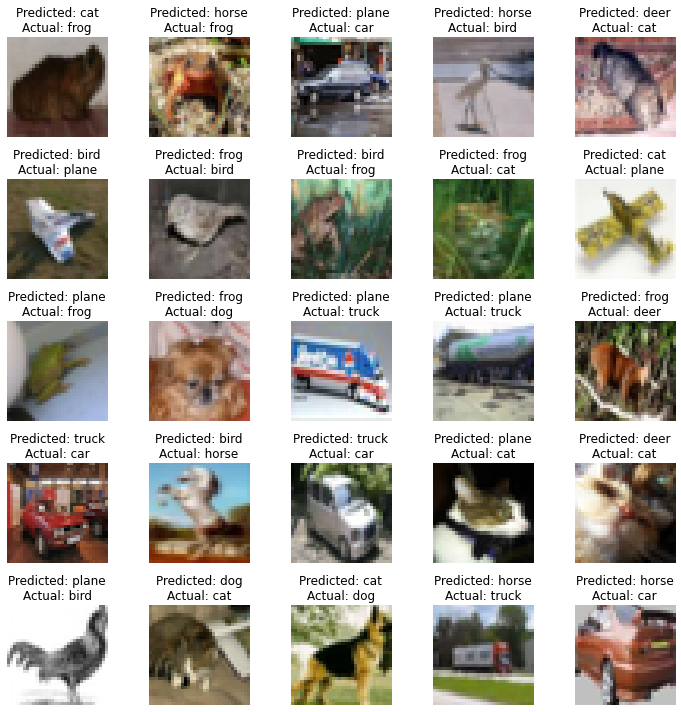

In [8]:
plot_misclassified_images(misclassified_imgs, data.classes, "misclassified_imgs.png")

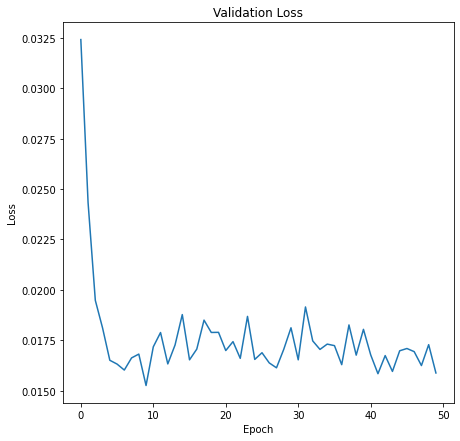

In [9]:
plot_graph(test_losses, "Loss")

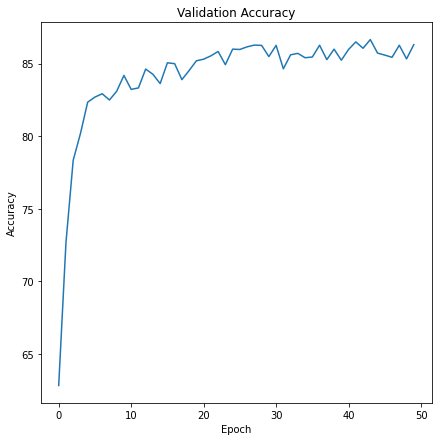

In [10]:
plot_graph(test_accs, "Accuracy")